In [0]:
import pandas as pd
import numpy as np
orders= pd.read_csv("orders.csv")
aisles=pd.read_csv("aisles.csv")
priors=pd.read_csv("order_products__prior.csv")
train=pd.read_csv("order_products__train.csv")
dept=pd.read_csv("departments.csv")
products=pd.read_csv("products.csv")
##orderid and products
##https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b
####predict which previously purchased products will be in a user’s next order. 

In [0]:
print('priors {}: {}'.format(priors.shape, ', '.join(priors.columns)))
print('orders {}: {}'.format(orders.shape, ', '.join(orders.columns)))
print('train {}: {}'.format(train.shape, ', '.join(train.columns)))

priors (3366701, 4): order_id, product_id, add_to_cart_order, reordered
orders (1174837, 7): order_id, user_id, eval_set, order_number, order_dow, order_hour_of_day, days_since_prior_order
train (1384617, 4): order_id, product_id, add_to_cart_order, reordered


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


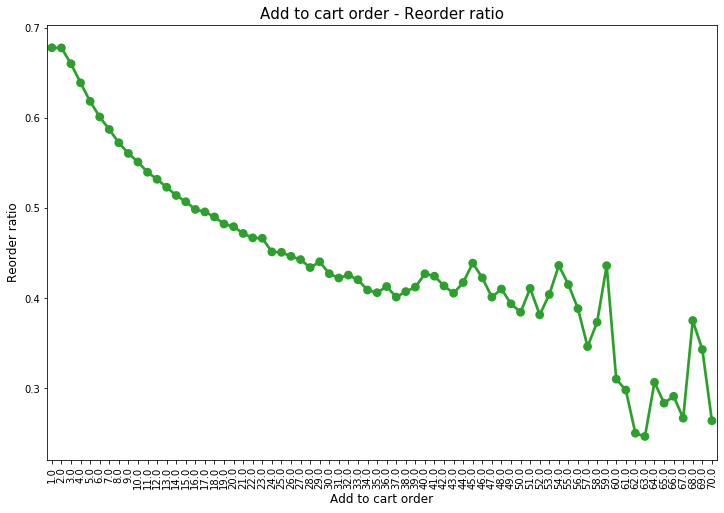

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
priors["add_to_cart_order_mod"] = priors["add_to_cart_order"].copy()
priors["add_to_cart_order_mod"].loc[priors["add_to_cart_order_mod"]>70] = 70
grouped_df = priors.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [0]:
train.head()

order_id  product_id  add_to_cart_order  reordered
order_id product_id                                                    
1        49302              1       49302                  1          1
         11109              1       11109                  2          1
         10246              1       10246                  3          0
         49683              1       49683                  4          0
         43633              1       43633                  5          1

In [0]:
#This file tells to which set (prior, train, test) an order belongs. You are predicting reordered items only for the test set orders. 'order_dow' is the day of week.
len(orders["order_number"].unique().tolist())
len(products["product_id"].unique().tolist())

49688

In [0]:
orders.isna().sum()

order_id                      0
user_id                       0
eval_set                      0
order_number                  0
order_dow                     0
order_hour_of_day             1
days_since_prior_order    70621
dtype: int64

In [0]:
products.info()
##21departments

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [0]:
products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [0]:
dept.head(4)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce


In [0]:
product_dept=pd.merge(products,dept, how= 'left', on='department_id')
product_dept.head(5)

,product_id,product_name,aisle_id,department_id,department
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,2,All-Seasons Salt,104,13,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen
4,5,Green Chile Anytime Sauce,5,13,pantry


In [0]:
product_dept_aisle=pd.merge(product_dept,aisles, how= 'left', on='aisle_id')

In [0]:
product_dept_aisle

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,alcohol,spirits
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen,frozen vegan vegetarian
49685,49686,Artisan Baguette,112,3,bakery,bread
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,pets,cat food care


In [0]:
priors.head(5)
len(orders["order_number"].unique().tolist())

100

In [0]:
orders.head(11)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [0]:
#PREPROCESSING
priors.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [0]:
prods = pd.DataFrame()
prods['orders'] = priors.groupby(priors.product_id).size()
prods['reorders'] = priors['reordered'].groupby(priors.product_id).sum()
prods['reorder_rate'] = (prods.reorders/prods.orders)


In [0]:
(prods.reorders/prods.orders)

product_id
1        0.613391
2        0.133333
3        0.732852
4        0.446809
5        0.600000
           ...   
49684    0.111111
49685    0.122449
49686    0.700000
49687    0.461538
49688    0.168539
Length: 49677, dtype: float64

In [0]:
products.head(20)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [0]:
######MERGING ORDERS AND PRIORS


In [0]:
products = products.join(prods, on='product_id')
products.set_index('product_id', drop=False, inplace=True)
products.head()

,product_id,product_name,aisle_id,department_id,orders,reorders,reorder_rate
product_id,,,,,,,
1,1,Chocolate Sandwich Cookies,61,19,1852.0,1136.0,0.613391
2,2,All-Seasons Salt,104,13,90.0,12.0,0.133333
3,3,Robust Golden Unsweetened Oolong Tea,94,7,277.0,203.0,0.732852
4,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,329.0,147.0,0.446809
5,5,Green Chile Anytime Sauce,5,13,15.0,9.0,0.600000


In [0]:

#len(priors["user_id"][202279].unique().tolist())

In [0]:
orders.set_index('order_id', inplace=True, drop=False)
priors = priors.join(orders, on='order_id', rsuffix='_')
priors.head(20)

,order_id,product_id,add_to_cart_order,reordered,order_id_,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,2,202279,prior,3,5,9,8.0
1,2,28985,2,1,2,202279,prior,3,5,9,8.0
2,2,9327,3,0,2,202279,prior,3,5,9,8.0
3,2,45918,4,1,2,202279,prior,3,5,9,8.0
4,2,30035,5,0,2,202279,prior,3,5,9,8.0
5,2,17794,6,1,2,202279,prior,3,5,9,8.0
6,2,40141,7,1,2,202279,prior,3,5,9,8.0
7,2,1819,8,1,2,202279,prior,3,5,9,8.0
8,2,43668,9,0,2,202279,prior,3,5,9,8.0
9,3,33754,1,1,3,205970,prior,16,5,17,12.0


In [0]:
priors.drop('order_id_', inplace=True, axis=1)

In [0]:
priors.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [0]:
########user feature
print("Computing User Features")

Computing User Features


In [0]:
usr=pd.DataFrame()

In [0]:
usr['average_days_between_orders'] = orders.groupby('user_id')['days_since_prior_order'].mean().astype(np.float32)

In [0]:
orders.groupby('user_id')['days_since_prior_order'].mean().astype(np.float32)

user_id
1         19.000000
2         16.285715
3         12.000000
4         17.000000
5         11.500000
            ...    
206205    16.666666
206206     3.716418
206207    14.312500
206208     7.367347
206209    18.461538
Name: days_since_prior_order, Length: 206209, dtype: float32

In [0]:
usr['nb_orders'] = orders.groupby('user_id').size().astype(np.int16)

In [0]:
usr.head()

,average_days_between_orders,nb_orders
user_id,,
1,19.000000,11
2,16.285715,15
3,12.000000,13
4,17.000000,6
5,11.500000,5


In [0]:
users = pd.DataFrame()

In [0]:
users['total_items'] = priors.groupby('user_id').size().astype(np.int16)

In [0]:
priors.groupby('user_id').size().astype(np.int16)

user_id
1          59
2         195
3          88
4          18
5          37
         ... 
206205     32
206206    285
206207    223
206208    677
206209    129
Length: 206209, dtype: int16

In [0]:
users['all_products'] = priors.groupby('user_id')['product_id'].apply(set)

In [0]:
users['total_distinct_items'] = users.all_products.map(len).astype(np.int16)


In [0]:
users = users.join(usr)
del usr

In [0]:
users.head()

,total_items,all_products,total_distinct_items,average_days_between_orders,nb_orders
user_id,,,,,
1,59,"{17122, 196, 26405, 46149, 14084, 13032, 26088...",18,19.000000,11
2,195,"{45066, 2573, 18961, 23, 32792, 1559, 22559, 1...",102,16.285715,15
3,88,"{17668, 44683, 48523, 21903, 14992, 21137, 324...",33,12.000000,13
4,18,"{21573, 42329, 17769, 35469, 37646, 1200, 1905...",17,17.000000,6
5,37,"{11777, 40706, 28289, 48775, 20754, 6808, 1398...",23,11.500000,5


In [0]:
users['average_basket'] = users.total_items/users.nb_orders
users.head()
 #The average_basket gives us the average number of product a particular user's basket have.

,total_items,all_products,total_distinct_items,average_days_between_orders,nb_orders,average_basket
user_id,,,,,,
1,59,"{17122, 196, 26405, 46149, 14084, 13032, 26088...",18,19.000000,11,5.363636
2,195,"{45066, 2573, 18961, 23, 32792, 1559, 22559, 1...",102,16.285715,15,13.000000
3,88,"{17668, 44683, 48523, 21903, 14992, 21137, 324...",33,12.000000,13,6.769231
4,18,"{21573, 42329, 17769, 35469, 37646, 1200, 1905...",17,17.000000,6,3.000000
5,37,"{11777, 40706, 28289, 48775, 20754, 6808, 1398...",23,11.500000,5,7.400000


In [0]:
####userXproduct features
priors.head(11)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0
5,2,17794,6,1,202279,prior,3,5,9,8.0
6,2,40141,7,1,202279,prior,3,5,9,8.0
7,2,1819,8,1,202279,prior,3,5,9,8.0
8,2,43668,9,0,202279,prior,3,5,9,8.0
9,3,33754,1,1,205970,prior,16,5,17,12.0


In [0]:
orders.head(19)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,,
2539329,2539329,1,prior,1,2,8,NaN
2398795,2398795,1,prior,2,3,7,15.0
473747,473747,1,prior,3,3,12,21.0
2254736,2254736,1,prior,4,4,7,29.0
431534,431534,1,prior,5,4,15,28.0
3367565,3367565,1,prior,6,2,7,19.0
550135,550135,1,prior,7,1,9,20.0
3108588,3108588,1,prior,8,1,14,14.0
2295261,2295261,1,prior,9,1,16,0.0


In [0]:
priors['user_product'] = priors.product_id + priors.user_id * 100000


In [0]:
d=dict()

In [0]:
for row in priors.itertuples():
    z = row.user_product
    if z not in d:
        d[z] = (1, (row.order_number, row.order_id),row.add_to_cart_order)
    else:
        d[z] = (d[z][0] + 1, max(d[z][1], (row.order_number, row.order_id)), d[z][2] + row.add_to_cart_order)

In [0]:
d

{20227933120: (5, (8, 104690), 10),
 20227928985: (5, (6, 132412), 16),
 20227909327: (1, (3, 2), 3),
 20227945918: (5, (7, 2382766), 24),
 20227930035: (3, (7, 2382766), 14),
 20227917794: (7, (7, 2382766), 25),
 20227940141: (5, (6, 132412), 29),
 20227901819: (2, (3, 2), 19),
 20227943668: (3, (6, 132412), 20),
 20597033754: (17, (25, 368699), 86),
 20597024838: (14, (25, 368699), 58),
 20597017704: (13, (25, 368699), 72),
 20597021903: (14, (25, 368699), 55),
 20597017668: (6, (16, 3), 54),
 20597046667: (13, (25, 368699), 69),
 20597017461: (4, (24, 2214773), 35),
 20597032665: (6, (24, 2214773), 45),
 17852046842: (17, (55, 1609396), 99),
 17852026434: (4, (42, 2715951), 19),
 17852039758: (19, (56, 1253720), 169),
 17852027761: (49, (56, 1253720), 401),
 17852010054: (29, (56, 1253720), 235),
 17852021351: (33, (55, 1609396), 301),
 17852022598: (12, (55, 1609396), 119),
 17852034862: (16, (54, 385597), 124),
 17852040285: (4, (43, 214045), 52),
 17852017616: (19, (56, 1253720),

In [0]:
userXproduct = pd.DataFrame.from_dict(d, orient='index')
del d

In [0]:
userXproduct
# We make a new DataFrame for each unique combination of user and product
# We add the number of times that particular product was ordered by the user
# it's added to cart order and the last ordered item

,0,1,2
20227933120,5,"(8, 104690)",10
20227928985,5,"(6, 132412)",16
20227909327,1,"(3, 2)",3
20227945918,5,"(7, 2382766)",24
20227930035,3,"(7, 2382766)",14
...,...,...,...
2524745309,1,"(24, 3421083)",2
2524721162,1,"(24, 3421083)",3
2524735211,1,"(24, 3421083)",5
2524711352,1,"(24, 3421083)",7


In [0]:
userXproduct.columns = ['nb_orders', 'last_order_id', 'sum_pos_in_cart']


In [0]:
userXproduct.nb_orders = userXproduct.nb_orders.astype(np.int16)
userXproduct.last_order_id = userXproduct.last_order_id.map(lambda x: x[1]).astype(np.int64)

In [0]:
userXproduct.sum_pos_in_cart = userXproduct.sum_pos_in_cart

In [0]:
print('user X product f', len(userXproduct))

user X product f 13307953


In [0]:
userXproduct.head()

,nb_orders,last_order_id,sum_pos_in_cart
20227933120,5,104690,10
20227928985,5,132412,16
20227909327,1,2,3
20227945918,5,2382766,24
20227930035,3,2382766,14


In [0]:
print('split orders : train, test')
test_orders = orders[orders.eval_set == 'test']
train_orders = orders[orders.eval_set == 'train']

train.set_index(['order_id', 'product_id'], inplace=True, drop=False)

split orders : train, test


In [0]:
len(test_orders)

75000

In [0]:
len(train_orders)

131209

In [0]:
train_orders.head(15)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,,
1187899,1187899,1,train,11,4,8,14.0
1492625,1492625,2,train,15,1,11,30.0
2196797,2196797,5,train,5,0,11,6.0
525192,525192,7,train,21,2,11,6.0
880375,880375,8,train,4,1,14,10.0
1094988,1094988,9,train,4,6,10,30.0
1822501,1822501,10,train,6,0,19,30.0
1827621,1827621,13,train,13,0,21,8.0
2316178,2316178,14,train,14,2,19,11.0


In [0]:
users.all_products[train_orders.user_id]

user_id
1         {17122, 196, 26405, 46149, 14084, 13032, 26088...
2         {45066, 2573, 18961, 23, 32792, 1559, 22559, 1...
5         {11777, 40706, 28289, 48775, 20754, 6808, 1398...
7         {11520, 35333, 519, 10504, 47623, 45066, 13198...
8         {11136, 8193, 17794, 26882, 39812, 24838, 651,...
                                ...                        
206199    {18952, 42504, 37387, 17426, 38930, 7702, 4610...
206200    {47626, 22035, 44053, 12312, 12845, 13870, 343...
206203    {4605, 34049, 47489, 26369, 13829, 10246, 1779...
206205    {20995, 21137, 22035, 21910, 17691, 31404, 210...
206209    {14727, 26503, 22920, 26634, 13838, 11791, 248...
Name: all_products, Length: 131209, dtype: object

In [0]:
order_list = []
product_list = []
labels = []
i=0
for row in train_orders.itertuples():
        i+=1
        if i%10000 == 0: print('order row',i)
        order_id = row.order_id
        user_id = row.user_id
        user_products = users.all_products[user_id]
        product_list += user_products
        # A list with order_id repeated len(user_products) time.
        order_list += [order_id] * len(user_products)
        if labels_given:
            labels += [(order_id, product) in train.index for product in user_products]

In [0]:
def features(selected_orders, labels_given=False):
    print('build candidate list')
    order_list = []
    product_list = []
    labels = []
    i=0
    for row in selected_orders.itertuples():
        i+=1
        if i%10000 == 0: print('order row',i)
        order_id = row.order_id
        user_id = row.user_id
        user_products = users.all_products[user_id]
        product_list += user_products
        # A list with order_id repeated len(user_products) time.
        order_list += [order_id] * len(user_products)
        if labels_given:
            labels += [(order_id, product) in train.index for product in user_products]
        
    df = pd.DataFrame({'order_id':order_list, 'product_id':product_list}, dtype=np.int32)
    labels = np.array(labels, dtype=np.int8)
    ##del order_list
    ##del product_list
    
    print('user related features')
    df['user_id'] = df.order_id.map(orders.user_id)
    df['user_total_orders'] = df.user_id.map(users.nb_orders)
    df['user_total_items'] = df.user_id.map(users.total_items)
    df['total_distinct_items'] = df.user_id.map(users.total_distinct_items)
    df['user_average_days_between_orders'] = df.user_id.map(users.average_days_between_orders)
    df['user_average_basket'] =  df.user_id.map(users.average_basket)
    
    print('order related features')
    # df['dow'] = df.order_id.map(orders.order_dow)
    df['order_hour_of_day'] = df.order_id.map(orders.order_hour_of_day)
    df['days_since_prior_order'] = df.order_id.map(orders.days_since_prior_order)
    df['days_since_ratio'] = df.days_since_prior_order / df.user_average_days_between_orders
    
    print('product related features')
    df['aisle_id'] = df.product_id.map(products.aisle_id)
    df['department_id'] = df.product_id.map(products.department_id)
    df['product_orders'] = df.product_id.map(products.orders).astype(np.int32)
    df['product_reorders'] = df.product_id.map(products.reorders)
    df['product_reorder_rate'] = df.product_id.map(products.reorder_rate)

    print('user_X_product related features')
    df['z'] = df.user_id * 100000 + df.product_id
    df.drop(['user_id'], axis=1, inplace=True)
    df['UP_orders'] = df.z.map(userXproduct.nb_orders)
    df['UP_orders_ratio'] = (df.UP_orders / df.user_total_orders).astype(np.float32)
    df['UP_last_order_id'] = df.z.map(userXproduct.last_order_id)
    df['UP_average_pos_in_cart'] = (df.z.map(userXproduct.sum_pos_in_cart) / df.UP_orders).astype(np.float32)
    df['UP_reorder_rate'] = (df.UP_orders / df.user_total_orders).astype(np.float32)
    df['UP_orders_since_last'] = df.user_total_orders - df.UP_last_order_id.map(orders.order_number)
    df['UP_delta_hour_vs_last'] = abs(df.order_hour_of_day - df.UP_last_order_id.map(orders.order_hour_of_day)).map(lambda x: min(x, 24-x)).astype(np.int8)
    #df['UP_same_dow_as_last_order'] = df.UP_last_order_id.map(orders.order_dow) == \
    #                                              df.order_id.map(orders.order_dow)

    df.drop(['UP_last_order_id', 'z'], axis=1, inplace=True)
    print(df.dtypes)
    print(df.memory_usage())
    return (df, labels)


pandas.core.frame.DataFrame

In [0]:
df_train, labels = features(train_orders, labels_given=True)

build candidate list
order row 10000
order row 20000
order row 30000
order row 40000
order row 50000
order row 60000
order row 70000
order row 80000
order row 90000
order row 100000
order row 110000
order row 120000
order row 130000
user related features
order related features
product related features
user_X_product related features
order_id                              int32
product_id                            int32
user_total_orders                     int16
user_total_items                      int16
total_distinct_items                  int16
user_average_days_between_orders    float32
user_average_basket                 float64
order_hour_of_day                     int64
days_since_prior_order              float64
days_since_ratio                    float64
aisle_id                              int64
department_id                         int64
product_orders                        int32
product_reorders                    float64
product_reorder_rate                float64
UP_or

In [0]:
len(train_orser)

8474661

In [0]:
orders

,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,
2539329,1,prior,1,2,8,NaN
2398795,1,prior,2,3,7,15.0
473747,1,prior,3,3,12,21.0
2254736,1,prior,4,4,7,29.0
431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...
2266710,206209,prior,10,5,18,29.0
1854736,206209,prior,11,4,10,30.0
626363,206209,prior,12,1,12,18.0


In [0]:
f_to_use = ['user_total_orders', 'user_total_items', 'total_distinct_items',
       'user_average_days_between_orders', 'user_average_basket',
       'order_hour_of_day', 'days_since_prior_order', 'days_since_ratio',
       'aisle_id', 'department_id', 'product_orders', 'product_reorders',
       'product_reorder_rate', 'UP_orders', 'UP_orders_ratio',
       'UP_average_pos_in_cart', 'UP_reorder_rate', 'UP_orders_since_last',
       'UP_delta_hour_vs_last'] # 'dow', 'UP_same_dow_as_last_order'

In [0]:
x=pd.merge(df_train,priors, left_on='order_id',how='left')
x.head(10)

TypeError: ignored

In [0]:
import lightgbm as lgb
d_train = lgb.Dataset(df_train[f_to_use], 
                     label=labels,
                     categorical_feature=['aisle_id', 'department_id'])  # , 'order_hour_of_day', 'dow'


In [0]:
d_train

In [0]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss'},
    'num_leaves': 96,
    'max_depth': 10,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.95,
    'bagging_freq': 5
}
ROUNDS = 100

print('light GBM train :-)')
bst = lgb.train(params, d_train, ROUNDS)
##lgb.plot_importance(bst, figsize=(9,20))


light GBM train :-)


LightGBMError: ignored

In [0]:
bst.best_score

defaultdict(dict, {})

In [0]:
df_test, _ = features(test_orders)

build candidate list
order row 10000
order row 20000
order row 30000
order row 40000
order row 50000
order row 60000
order row 70000
user related features
order related features
product related features
user_X_product related features
order_id                              int32
product_id                            int32
user_total_orders                     int16
user_total_items                      int16
total_distinct_items                  int16
user_average_days_between_orders    float32
user_average_basket                 float64
order_hour_of_day                     int64
days_since_prior_order              float64
days_since_ratio                    float64
aisle_id                              int64
department_id                         int64
product_orders                        int32
product_reorders                    float64
product_reorder_rate                float64
UP_orders                             int16
UP_orders_ratio                     float32
UP_average_pos_in

In [0]:
df_test

,order_id,product_id,user_total_orders,user_total_items,total_distinct_items,user_average_days_between_orders,user_average_basket,order_hour_of_day,days_since_prior_order,days_since_ratio,aisle_id,department_id,product_orders,product_reorders,product_reorder_rate,UP_orders,UP_orders_ratio,UP_average_pos_in_cart,UP_reorder_rate,UP_orders_since_last,UP_delta_hour_vs_last
0,2774568,17668,13,88,33,12.000000,6.769231,15,11.0,0.916667,91,16,2110,1220.0,0.578199,5,0.384615,3.600000,0.384615,2,3
1,2774568,44683,13,88,33,12.000000,6.769231,15,11.0,0.916667,83,4,22275,11981.0,0.537868,2,0.153846,9.500000,0.153846,7,1
2,2774568,48523,13,88,33,12.000000,6.769231,15,11.0,0.916667,37,1,5129,2376.0,0.463248,2,0.153846,6.500000,0.153846,4,1
3,2774568,21903,13,88,33,12.000000,6.769231,15,11.0,0.916667,123,4,241921,186884.0,0.772500,8,0.615385,4.250000,0.615385,1,0
4,2774568,14992,13,88,33,12.000000,6.769231,15,11.0,0.916667,83,4,29069,16942.0,0.582820,2,0.153846,7.000000,0.153846,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4833287,803273,44532,50,677,198,7.367347,13.540000,11,4.0,0.542936,3,19,311,124.0,0.398714,1,0.020000,11.000000,0.020000,7,3
4833288,803273,46069,50,677,198,7.367347,13.540000,11,4.0,0.542936,123,4,9240,5420.0,0.586580,7,0.140000,5.571429,0.140000,4,1
4833289,803273,12791,50,677,198,7.367347,13.540000,11,4.0,0.542936,3,19,1393,755.0,0.541996,1,0.020000,12.000000,0.020000,7,3
4833290,803273,14332,50,677,198,7.367347,13.540000,11,4.0,0.542936,72,13,6046,1424.0,0.235528,1,0.020000,9.000000,0.020000,8,8


In [0]:
preds = bst.predict(df_test[f_to_use])

In [0]:
df_test
df_test.pred.min()

0.0013677881707061235

In [0]:
df_test, _ = features(test_orders)

print('light GBM predict')
preds = bst.predict(df_test[f_to_use])

df_test['pred'] = preds

TRESHOLD = 0.22  # guess, should be tuned with crossval on a subset of train data

d = dict()
for row in df_test.itertuples():
    if row.pred > TRESHOLD:
        try:
            d[row.order_id] += ' ' + str(row.product_id)
        except:
            d[row.order_id] = str(row.product_id)

for order in test_orders.order_id:
    if order not in d:
        d[order] = 'None'

sub = pd.DataFrame.from_dict(d, orient='index')

sub.reset_index(inplace=True)
sub.columns = ['order_id', 'products']
sub.to_csv('sub.csv', index=False)

build candidate list
order row 10000
order row 20000
order row 30000
order row 40000
order row 50000
order row 60000
order row 70000
user related features
order related features
product related features
user_X_product related features
order_id                              int32
product_id                            int32
user_total_orders                     int16
user_total_items                      int16
total_distinct_items                  int16
user_average_days_between_orders    float32
user_average_basket                 float64
order_hour_of_day                     int64
days_since_prior_order              float64
days_since_ratio                    float64
aisle_id                              int64
department_id                         int64
product_orders                        int32
product_reorders                    float64
product_reorder_rate                float64
UP_orders                             int16
UP_orders_ratio                     float32
UP_average_pos_in

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import (roc_curve, auc, accuracy_score)
x_train, x_test, y_train, y_test = train_test_split(d_train, y, test_size = 0.25, random_state = 0)

In [0]:
#####def accuracy(preds, df_train):
    ###labels = df_train.get_label()
  ###  preds = 1. / (1. + np.exp(-preds))
   ## return 'accuracy', np.mean(labels == (preds > 0.22)), True
